# Plot a map of the salt lakes

In [22]:
import xarray as xr

In [142]:
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/' 
salt_path = f'{root}saltlakes_max/clake_639l2_yearMAX_saline'

In [143]:
ds= xr.open_dataset(salt_path,engine='cfgrib',backend_kwargs={'indexpath': ''})
ds =  ds.assign_coords({"longitude": (((ds.longitude + 180) % 360) - 180)}) #long3 ---> long1
df = ds.to_dataframe().reset_index()

In [144]:
ds

<xarray.Dataset>
Dimensions:     (values: 542080)
Coordinates:
    time        datetime64[ns] 2011-01-31
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    latitude    (values) float64 89.78 89.78 89.78 ... -89.78 -89.78 -89.78
    longitude   (values) float64 0.0 20.0 40.0 60.0 ... -80.0 -60.0 -40.0 -20.0
    valid_time  datetime64[ns] 2011-01-31
Dimensions without coordinates: values
Data variables:
    cl          (values) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-09-02T14:48 GRIB to CDM+CF via cfgrib-0.9.1...

In [34]:
dfNZ = df[df['cl'] != 0.0]


In [40]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude']
    y = df['longitude']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    ax.scatter(-180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.


    

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

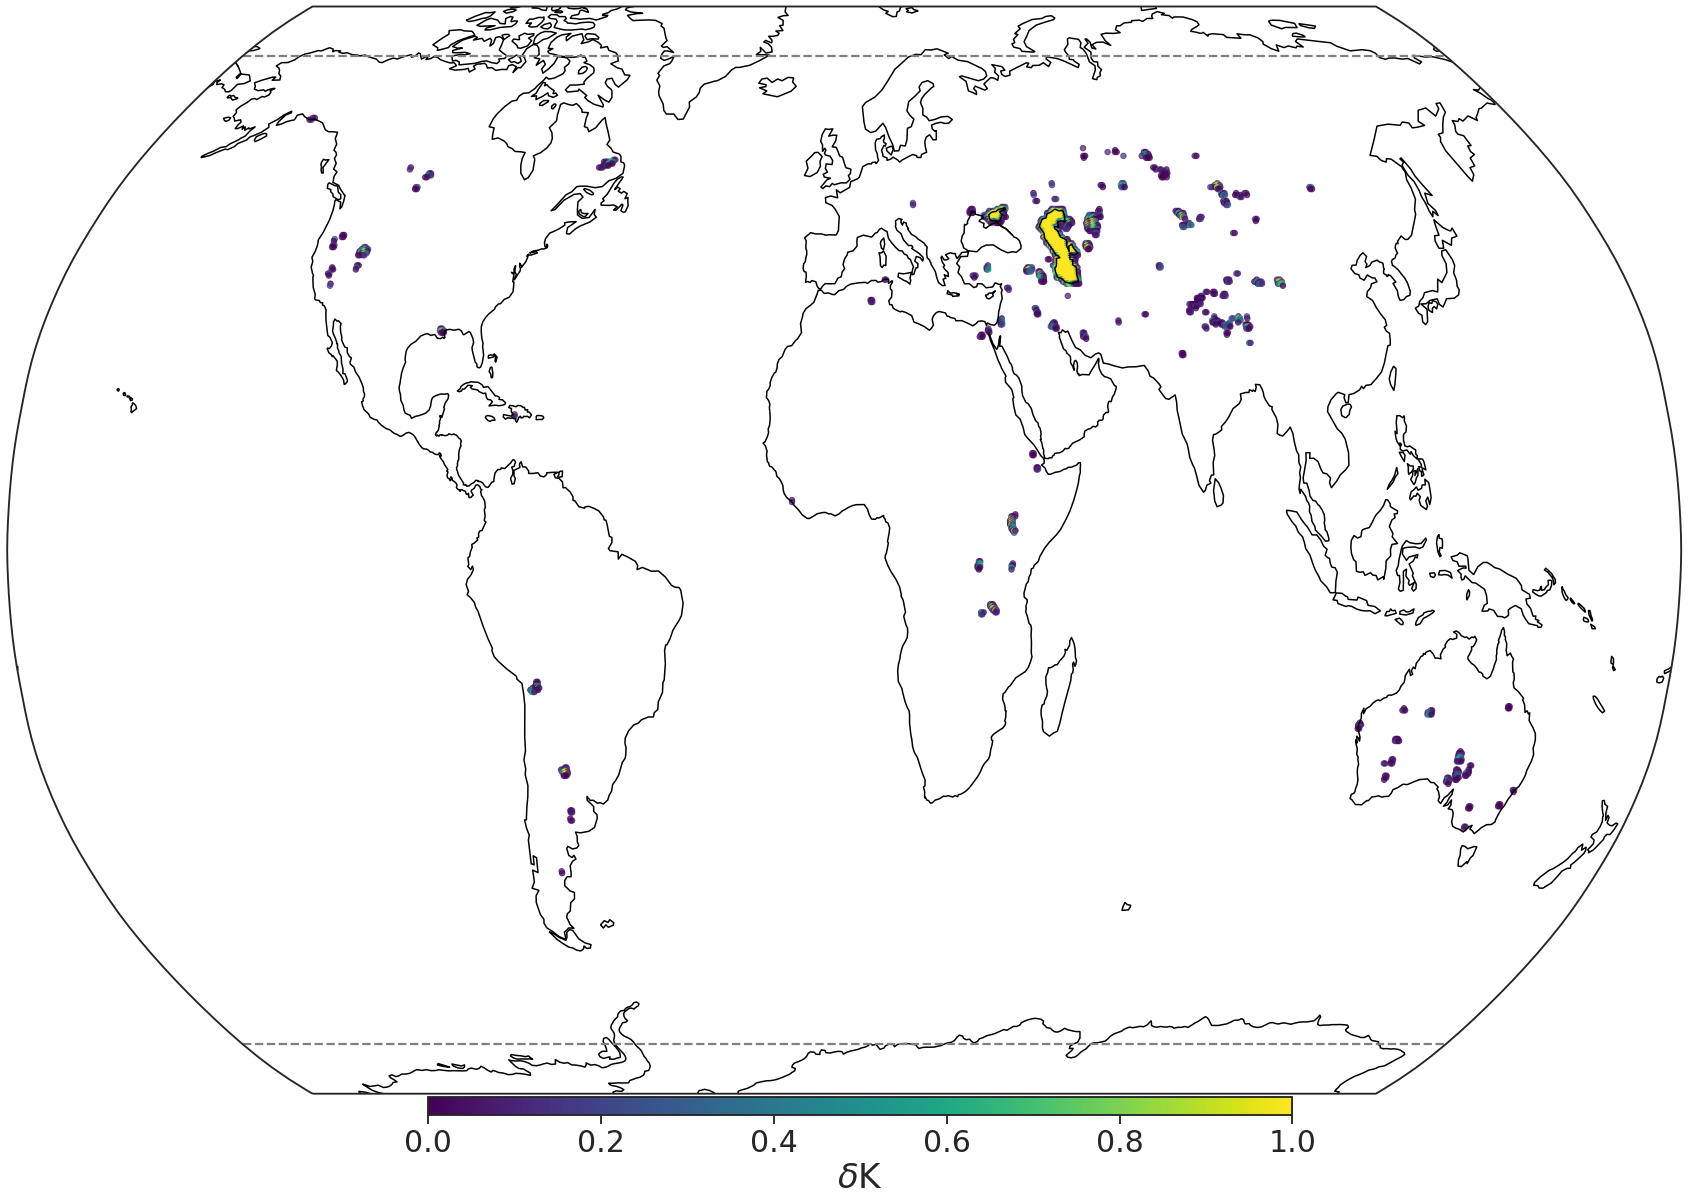

In [41]:
RobinsonPlot(dfNZ,'cl',vmin=0,vmax=1,cmap=plt.cm.viridis,markersize = 30,savefig=None,ncircles=None)


In [63]:
dfNZ.query('latitude == -8.852456297387976')

values       time   step  surface  latitude  longitude valid_time  \
310825  310825 2011-01-31 0 days      0.0 -8.852456   29.53125 2011-01-31   
310826  310826 2011-01-31 0 days      0.0 -8.852456   29.81250 2011-01-31   

              cl  
310825  0.409067  
310826  0.081161

---

# Plot a map of the monthly maps

In [2]:


import glob
import numpy as np

root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/' 
lake_files = sorted(glob.glob(f'{root}BonusClimate/clake*'))

In [3]:
lake_files

['/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month01',
 '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month02',
 '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month03',
 '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month04',
 '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month05',
 '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month06',
 '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month07',
 '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month08',
 '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month09',
 '/network/group/ao

In [69]:
! grib_ls /network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month01 | head -10

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month01
edition      centre       date         dataType     gridType     stepRange    typeOfLevel  level        shortName    packingType  
2            ecmf         20110131     af           reduced_gg   0            surface      0            cl           grid_simple 
1 of 1 messages in /network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month01

1 of 1 total messages in 1 files


In [70]:
f = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month01'
ds_lake = xr.open_dataset(f,engine='cfgrib',backend_kwargs={'indexpath': ''})


In [96]:
feb = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month02'
ds_lake_feb = xr.open_dataset(feb,engine='cfgrib',backend_kwargs={'indexpath': ''})

In [97]:
aug = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month08'
ds_lake_aug = xr.open_dataset(aug,engine='cfgrib',backend_kwargs={'indexpath': ''})

In [84]:
V20_cl = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/climate.v020/climate.v020/639l_2/clake'
ds_V20cl = xr.open_dataset(V20_cl,engine='cfgrib',backend_kwargs={'indexpath': ''})

In [134]:
ds_V20cl

<xarray.Dataset>
Dimensions:     (values: 542080)
Coordinates:
    time        datetime64[ns] 2011-01-31
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    latitude    (values) float64 89.78 89.78 89.78 ... -89.78 -89.78 -89.78
    longitude   (values) float64 0.0 20.0 40.0 60.0 ... 280.0 300.0 320.0 340.0
    valid_time  datetime64[ns] 2011-01-31
Dimensions without coordinates: values
Data variables:
    cl          (values) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-09-02T14:07 GRIB to CDM+CF via cfgrib-0.9.1...

In [98]:


differnce_feb = ds_lake_feb - ds_V20cl
differnce_aug = ds_lake_aug - ds_V20cl



In [101]:
delta_cl_feb = differnce_feb.cl
delta_cl_aug = differnce_aug.cl


In [102]:
df_feb = delta_cl_feb.to_dataframe()
df_aug = delta_cl_aug.to_dataframe()


In [105]:
df_aug.cl.min() #('cl < 0')

-0.060551643

In [106]:
df_feb.cl.min() #query('cl < 0')

-0.06136334

In [126]:
df_aug['longitude_ERA'] = ((df_aug['longitude'] + 180) % 360) - 180 #long3 ---> long1


In [136]:
worst_guys = df_aug.sort_values(by=['cl'],ascending=True).iloc[0:400]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])


In [139]:
all_worst_guys = df_aug.query('cl < 0') #,ascending=True).iloc[0:400]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])


In [141]:
all_worst_guys

time   step  surface   latitude  longitude valid_time  \
values                                                               
1954   2011-01-31 0 days      0.0  83.606402     321.60 2011-01-31   
1958   2011-01-31 0 days      0.0  83.606402     331.20 2011-01-31   
2111   2011-01-31 0 days      0.0  83.325378     317.25 2011-01-31   
2112   2011-01-31 0 days      0.0  83.325378     319.50 2011-01-31   
2114   2011-01-31 0 days      0.0  83.325378     324.00 2011-01-31   
...           ...    ...      ...        ...        ...        ...   
531938 2011-01-31 0 days      0.0 -74.613520     299.00 2011-01-31   
532162 2011-01-31 0 days      0.0 -74.894549     163.00 2011-01-31   
533411 2011-01-31 0 days      0.0 -75.737636     332.00 2011-01-31   
533412 2011-01-31 0 days      0.0 -75.737636     333.00 2011-01-31   
534997 2011-01-31 0 days      0.0 -77.142781     328.80 2011-01-31   

                  cl  longitude_ERA  
values                               
1954   -2.894402e-04         -38.40  
1958   -1.411438e-04         -28.80  
2111   -7.419586e-04         -42.75  
2112   -9.155273e-05         -40.50  
2114   -2.384186e-07         -36.00  
...              ...            ...  
531938 -3.204346e-04         -61.00  
532162 -1.192093e-05         163.00  
533411 -1.144409e-05         -28.00  
533412 -3.892183e-04         -27.00  
534997 -2.956390e-05         -31.20  

[6917 rows x 8 columns]

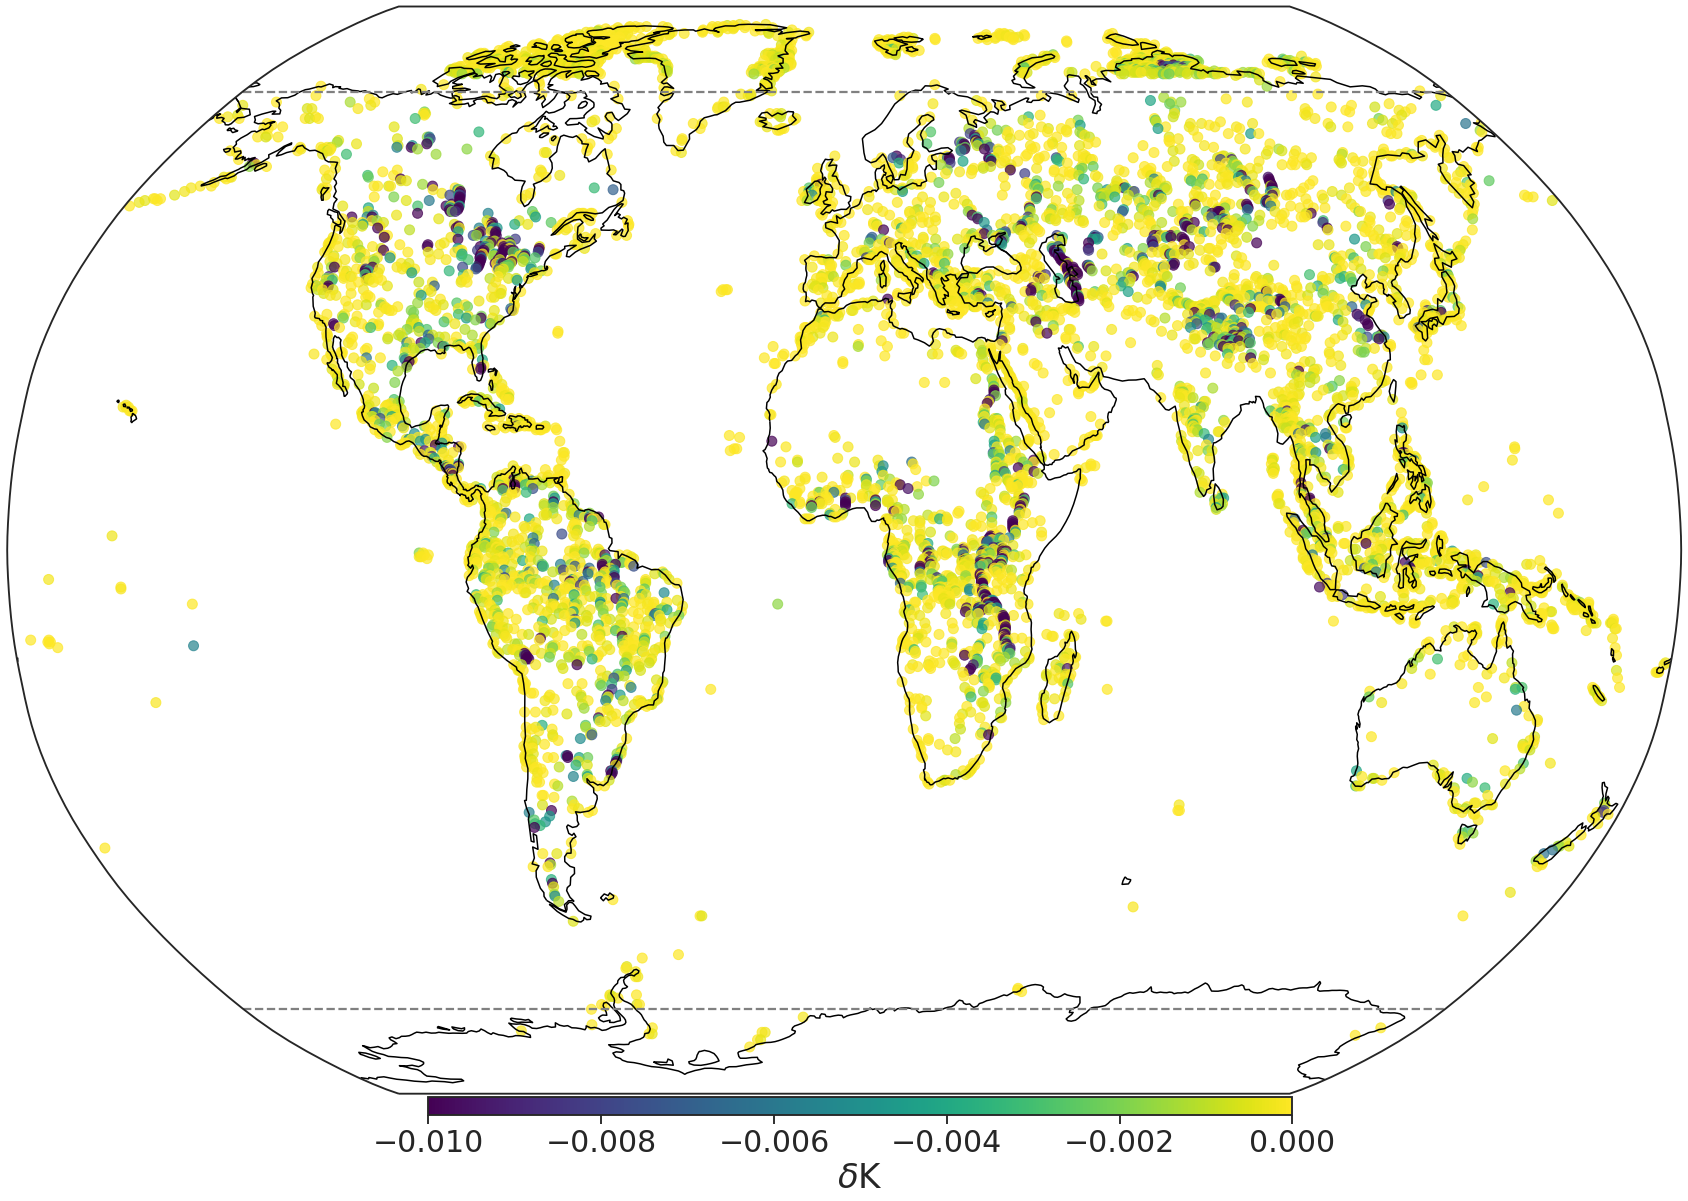

In [140]:
RobinsonPlot(all_worst_guys,'cl',vmin=-0.01,vmax=0,cmap=plt.cm.viridis,markersize = 100,savefig=None,ncircles=None)


In [145]:
all_good_guys = df_aug.query('cl >= 0') #,ascending=True).iloc[0:400]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])


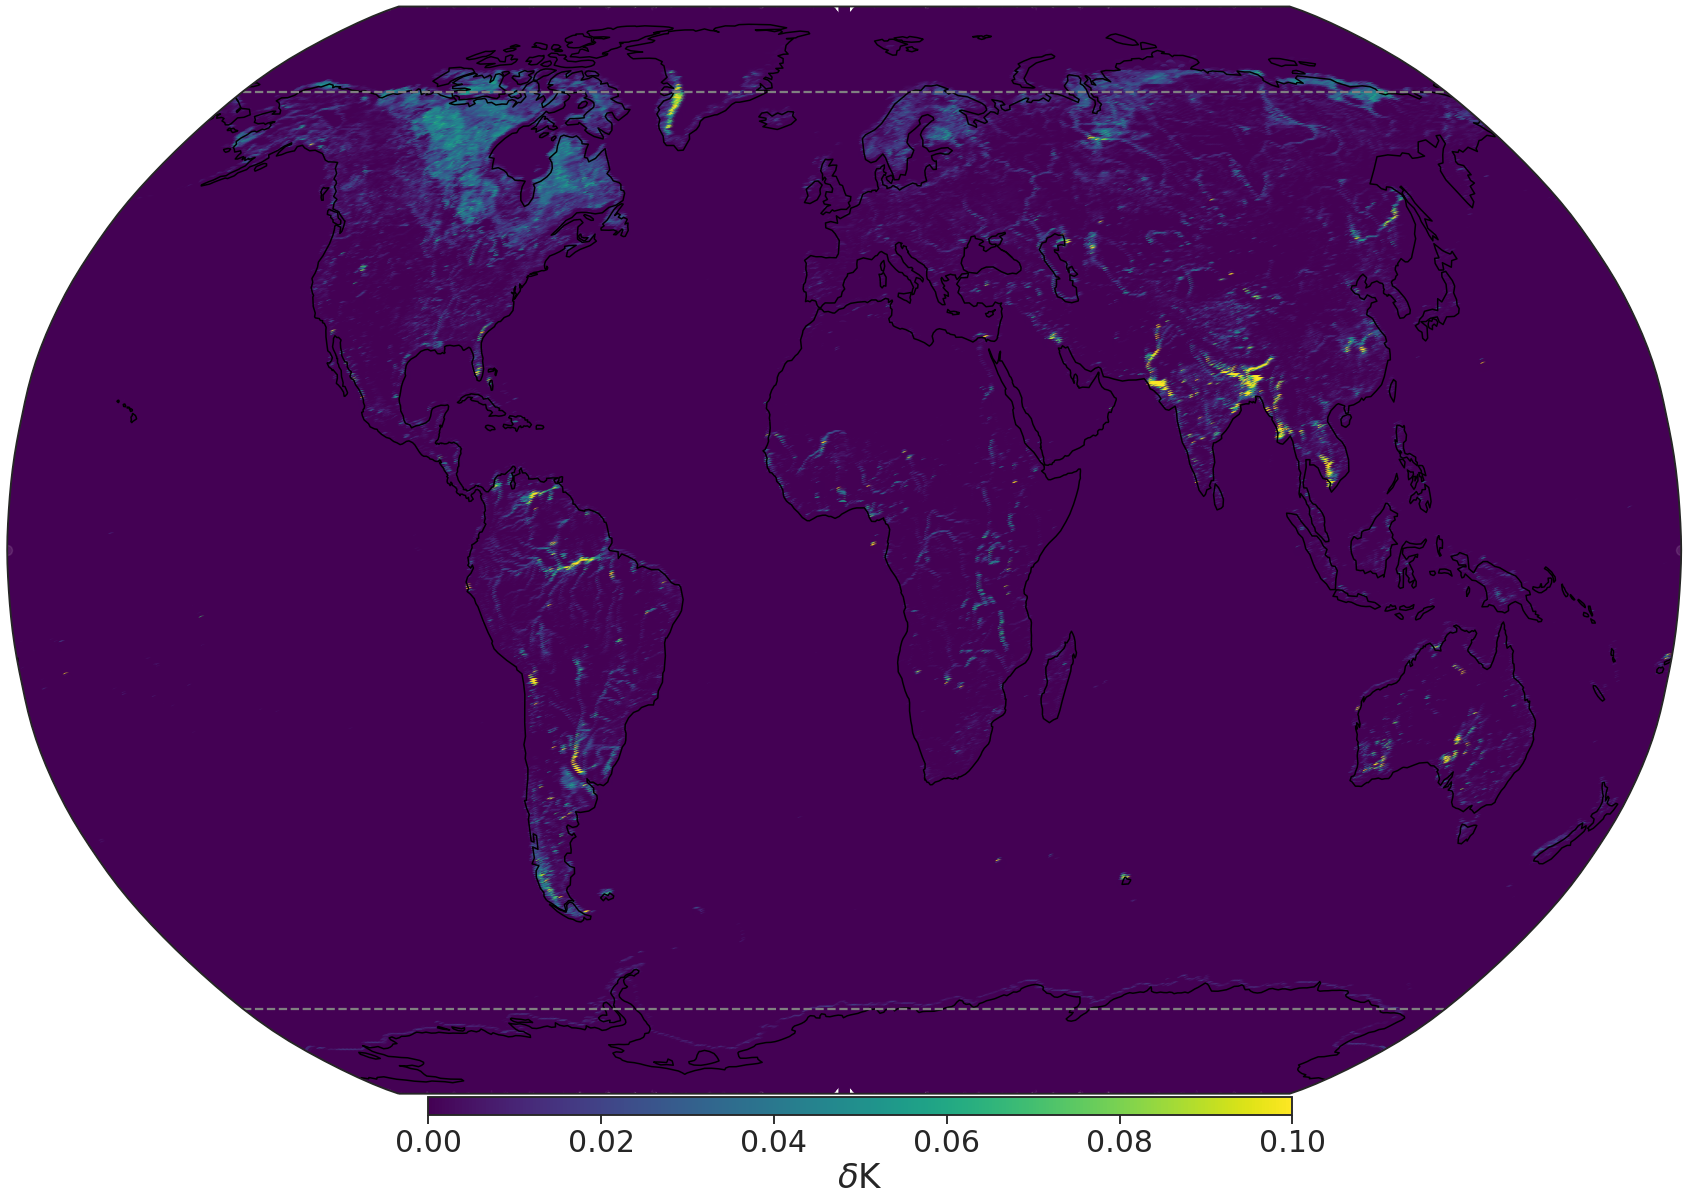

In [146]:
RobinsonPlot(all_good_guys,'cl',vmin=0,vmax=0.1,cmap=plt.cm.viridis,markersize = 100,savefig=None,ncircles=None)


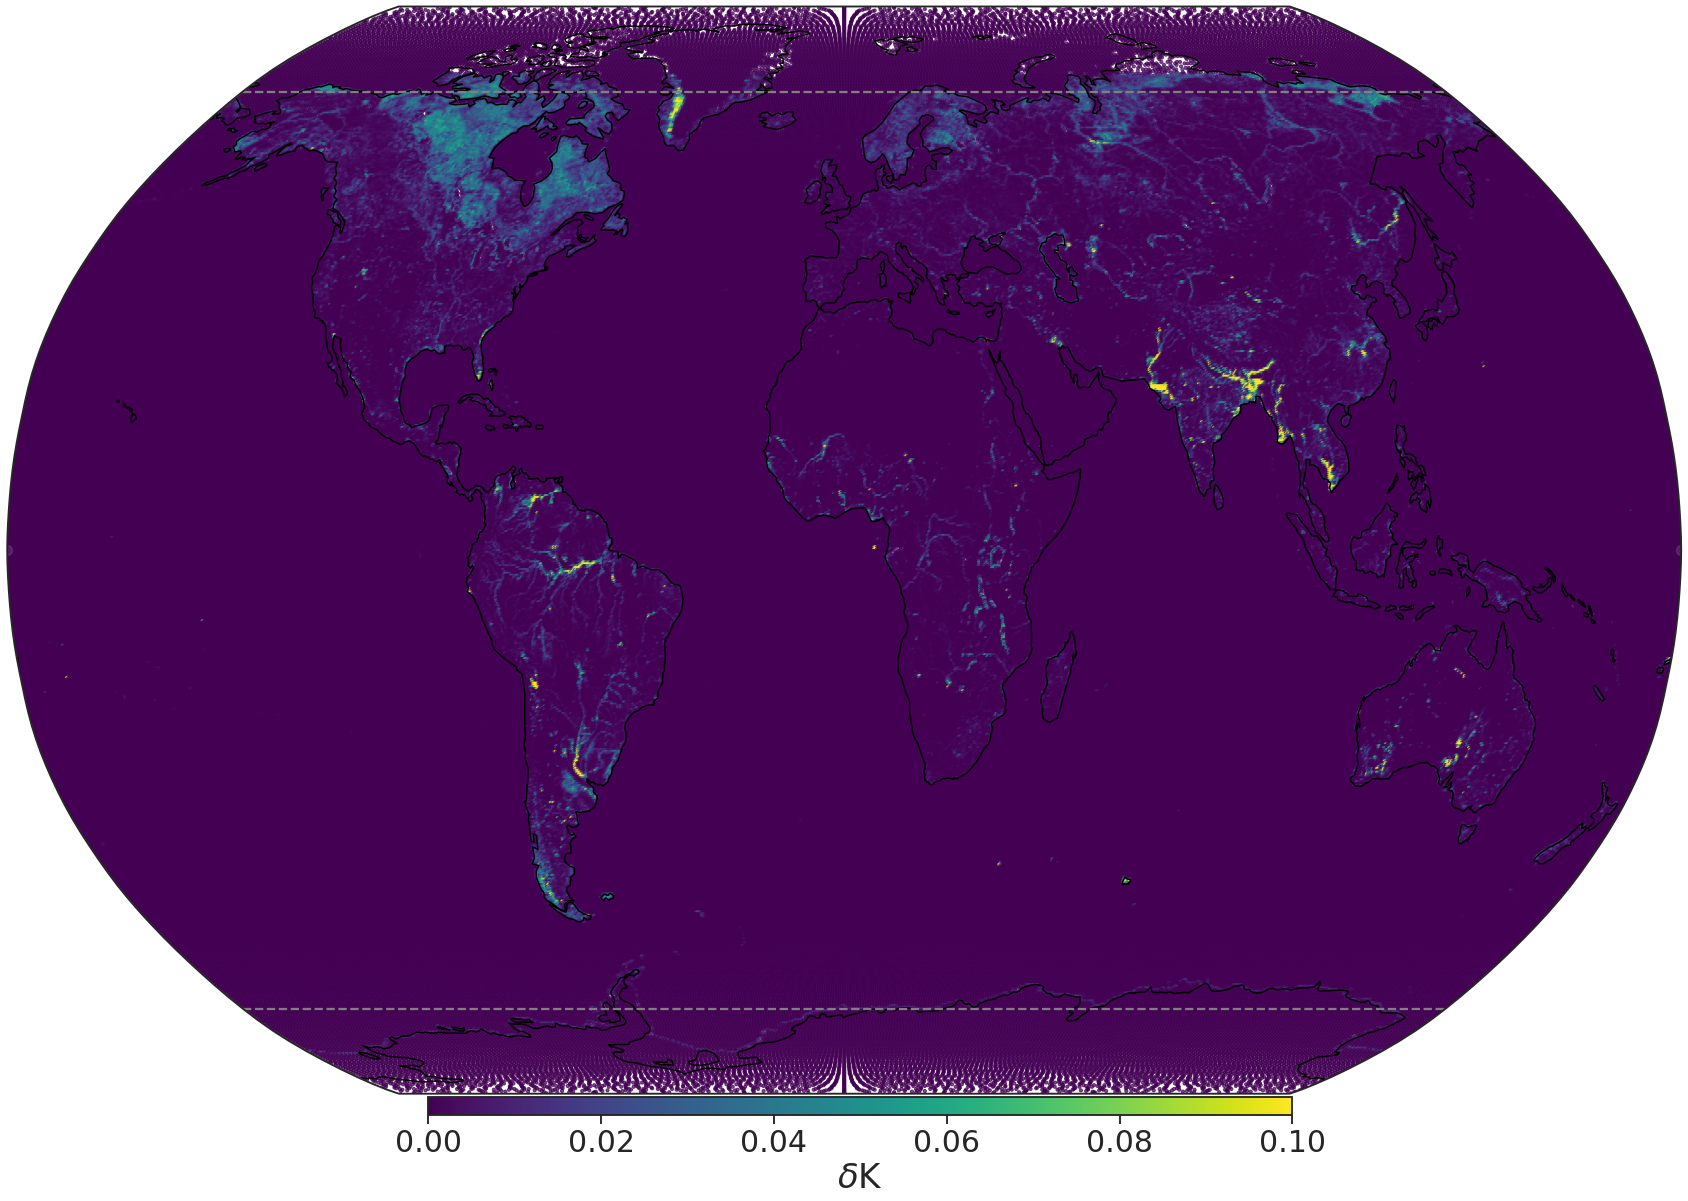

In [147]:
RobinsonPlot(all_good_guys,'cl',vmin=0,vmax=0.1,cmap=plt.cm.viridis,markersize = 10,savefig=None,ncircles=None)


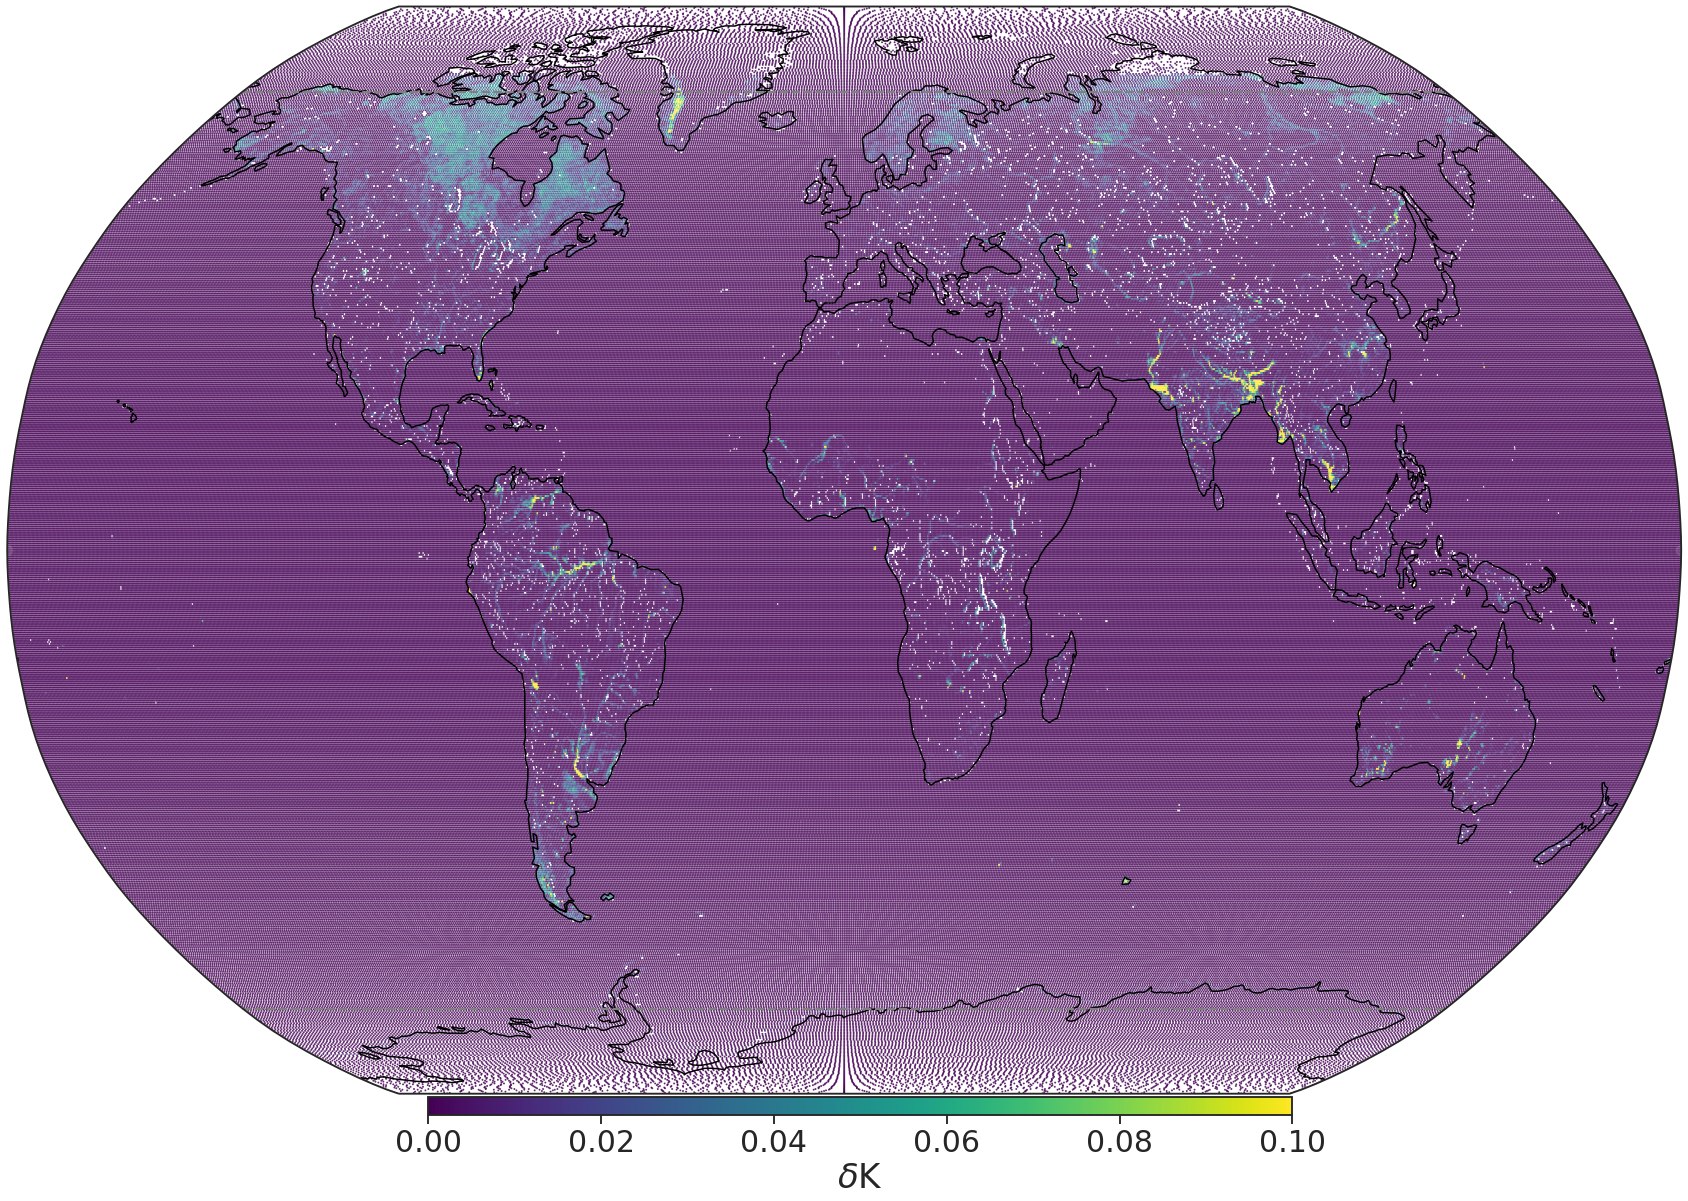

In [148]:
RobinsonPlot(all_good_guys,'cl',vmin=0,vmax=0.1,cmap=plt.cm.viridis,markersize = 1,savefig=None,ncircles=None)


In [124]:
df.cl.mean()

0.00047781796

<AxesSubplot:>

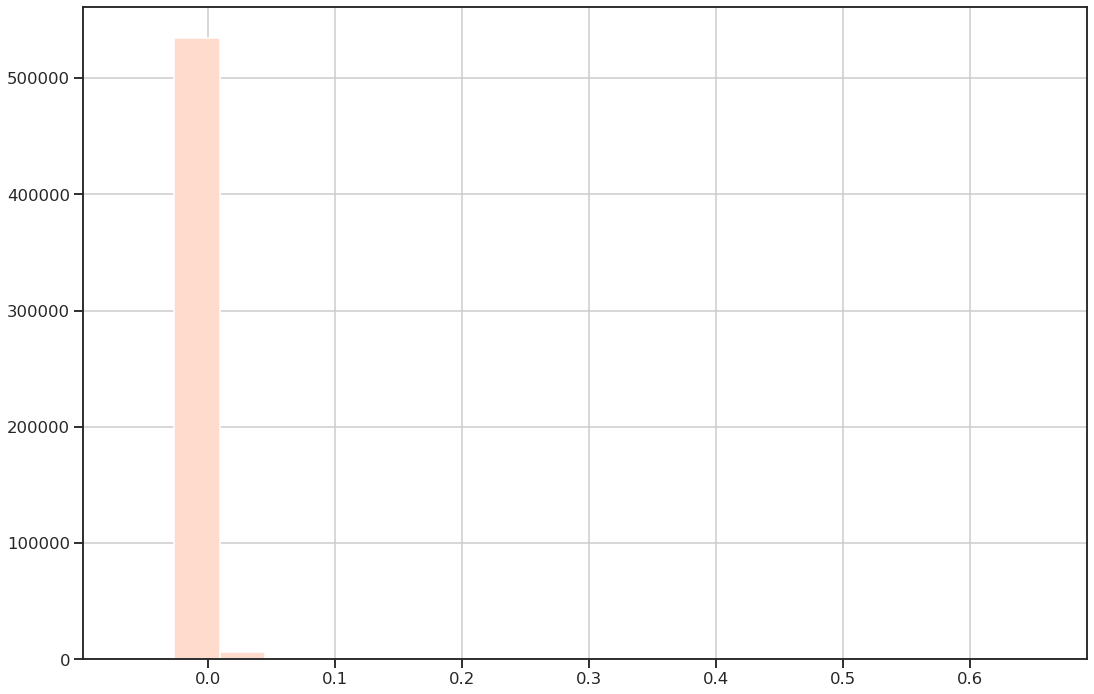

In [123]:
df.cl.hist(bins=20)

In [114]:
aug_cl_df = ds_lake_aug.to_dataframe()

In [115]:
aug_cl_df.query('latitude == -1.8266973354899971 & longitude ==29.25' )

time   step  surface  latitude  longitude valid_time        cl
values                                                                     
278824 2011-01-31 0 days      0.0 -1.826697      29.25 2011-01-31  0.608374

In [116]:
v20_df = ds_V20cl.to_dataframe()

In [117]:
v20_df.query('latitude == -1.8266973354899971 & longitude ==29.25' )

time   step  surface  latitude  longitude valid_time       cl
values                                                                    
278824 2011-01-31 0 days      0.0 -1.826697      29.25 2011-01-31  0.66858

In [110]:
row = df_aug.sort_values(by=['cl'],ascending=True).iloc[2]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])


In [111]:
row.latitude

-1.8266973354899971

In [112]:
row.longitude

29.25

In [108]:
df_feb.sort_values(by=['cl'],ascending=True).iloc[0]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])


time          2011-01-31 00:00:00
step              0 days 00:00:00
surface                       0.0
latitude               -10.538638
longitude                34.59375
valid_time    2011-01-31 00:00:00
cl                      -0.061363
Name: 318523, dtype: object

In [93]:
df = delta_cl.to_dataframe()
df['longitude_ERA'] = ((df['longitude'] + 180) % 360) - 180 #long3 ---> long1


In [94]:
df

time   step  surface   latitude  longitude valid_time   cl  \
values                                                                    
0      2011-01-31 0 days      0.0  89.784877        0.0 2011-01-31  0.0   
1      2011-01-31 0 days      0.0  89.784877       20.0 2011-01-31  0.0   
2      2011-01-31 0 days      0.0  89.784877       40.0 2011-01-31  0.0   
3      2011-01-31 0 days      0.0  89.784877       60.0 2011-01-31  0.0   
4      2011-01-31 0 days      0.0  89.784877       80.0 2011-01-31  0.0   
...           ...    ...      ...        ...        ...        ...  ...   
542075 2011-01-31 0 days      0.0 -89.784877      260.0 2011-01-31  0.0   
542076 2011-01-31 0 days      0.0 -89.784877      280.0 2011-01-31  0.0   
542077 2011-01-31 0 days      0.0 -89.784877      300.0 2011-01-31  0.0   
542078 2011-01-31 0 days      0.0 -89.784877      320.0 2011-01-31  0.0   
542079 2011-01-31 0 days      0.0 -89.784877      340.0 2011-01-31  0.0   

        longitude_ERA  
values                 
0                 0.0  
1                20.0  
2                40.0  
3                60.0  
4                80.0  
...               ...  
542075         -100.0  
542076          -80.0  
542077          -60.0  
542078          -40.0  
542079          -20.0  

[542080 rows x 8 columns]

In [89]:
df.cl.min()

-0.06253171

In [95]:
df.sort_values(by=['cl'],ascending=True).iloc[0]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])


time             2011-01-31 00:00:00
step                 0 days 00:00:00
surface                          0.0
latitude                  -10.538638
longitude                   34.59375
valid_time       2011-01-31 00:00:00
cl                         -0.062532
longitude_ERA               34.59375
Name: 318523, dtype: object

In [15]:
import xarray as xr
choice_latitude = -37.798581306687026
choice_longitude = 148.66666666666663


#This is salt lake city
choice_latitude = 41.17094491970063
choice_longitude = -113.39999999999998


# #Lake natron
# choice_latitude = -2.3887580539270044
# choice_longitude = 36.0


# #This is a random point
# choice_latitude = -8.852456297387976
# choice_longitude = 120.65625

# #This is a random point
# choice_latitude = 64.2154205363026
# choice_longitude = 23.75


# #This is chott

# choice_latitude = 1.2646366169457137
# choice_longitude = 121.21875


# #Lake natron centre
# choice_latitude = -2.3887580539270044
# choice_longitude = 36.0



# #Lake natron north
# choice_latitude = -2.10772769472398
# choice_longitude = 36.0


#afghanistan
#choice_latitude = 31.615914311651938
#choice_longitude = 61.12


#juncal

choice_latitude = -33.021065936911214
choice_longitude = -70.07999999999998



list_of_cls = []
for l in lake_files:
    
    
    ds_lake = xr.open_dataset(l,engine='cfgrib',backend_kwargs={'indexpath': ''})
    df_lake = ds_lake.to_dataframe().reset_index()

    #Create some extra cols
    df_lake['latitude_ERA'] = df_lake['latitude']
    df_lake['longitude_ERA'] = ((df_lake['longitude'] + 180) % 360) - 180 #long3 ---> long1
    
    
    row = df_lake.query(f'latitude_ERA == {choice_latitude} & longitude_ERA == {choice_longitude}')    
    list_of_cls.extend([row.cl.values[0]])
    
    display(row)
    
print (np.mean(list_of_cls))
print(np.std(list_of_cls))

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

              cl  latitude_ERA  longitude_ERA  
417264  0.001775    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

              cl  latitude_ERA  longitude_ERA  
417264  0.001796    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

              cl  latitude_ERA  longitude_ERA  
417264  0.001903    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

              cl  latitude_ERA  longitude_ERA  
417264  0.001996    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

            cl  latitude_ERA  longitude_ERA  
417264  0.0029    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

             cl  latitude_ERA  longitude_ERA  
417264  0.00227    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

              cl  latitude_ERA  longitude_ERA  
417264  0.002392    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

              cl  latitude_ERA  longitude_ERA  
417264  0.002621    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

              cl  latitude_ERA  longitude_ERA  
417264  0.002447    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

              cl  latitude_ERA  longitude_ERA  
417264  0.001912    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

              cl  latitude_ERA  longitude_ERA  
417264  0.001774    -33.021066         -70.08

values       time   step  surface   latitude  longitude valid_time  \
417264  417264 2011-01-31 0 days      0.0 -33.021066     289.92 2011-01-31   

              cl  latitude_ERA  longitude_ERA  
417264  0.001794    -33.021066         -70.08

0.0021315713
0.0003670737


In [150]:
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/processed_data/joined_data/'
f=f'{root}2016_MLS.parquet'
df = pd.read_parquet(f)

In [151]:
df

sp       msl       u10       v10       t2m     aluvp     aluvd  \
0        0.319781 -3.312112 -0.272708 -0.433632 -1.281853 -0.540116 -0.530686   
1        0.488203 -3.344310 -1.563556 -0.321791 -0.938681 -0.405089 -0.468140   
2        0.356893 -3.287817 -0.523570  0.267331 -1.176200 -0.585751 -0.564334   
3        0.468569 -3.296013 -1.536535  0.212600 -0.953725 -0.405089 -0.468140   
4        0.563676 -3.255912 -1.270628  0.163648 -0.969454 -0.405089 -0.468140   
...           ...       ...       ...       ...       ...       ...       ...   
3011763  0.996274  1.173116  2.265275  0.176417 -1.829187 -0.405095 -0.468147   
3011764  0.985719  1.173702  2.505697 -0.401147 -1.835227 -0.405095 -0.468147   
3011765  0.931810  1.176921  2.693306 -0.782223 -1.882982 -0.405095 -0.468147   
3011766  0.931016  1.164042  2.973031 -1.040240 -1.899964 -0.405095 -0.468147   
3011767  0.960637  1.148821  3.134540 -1.281940 -1.901446 -0.405095 -0.468147   

            alnip     alnid      istl1  ...      z_v20  slor_v20  \
0       -1.221462 -1.287657   0.053567  ... -17.852295 -0.876279   
1       -1.542488 -1.693358   0.053567  ...  -1.275181 -0.013794   
2       -0.857613 -0.884000   0.053567  ...  -2.451099 -0.114521   
3       -1.542488 -1.693358   0.053567  ...   2.348283 -0.013794   
4       -1.542488 -1.693358   0.053567  ...  -0.229546 -0.013794   
...           ...       ...        ...  ...        ...       ...   
3011763 -1.542491 -1.693358 -12.171152  ...   0.134740 -0.013794   
3011764 -1.542491 -1.693358 -12.251472  ...   0.140643 -0.013794   
3011765 -1.542491 -1.693358 -12.772021  ...   0.430301 -0.013794   
3011766 -1.542491 -1.693358 -13.012979  ...   0.102275 -0.013794   
3011767 -1.542491 -1.693358 -13.064830  ...   0.038609 -0.013794   

         clake_monthly_value  cl_saline   MODIS_LST  latitude_ERA  \
0                  -0.264192  -0.069769  268.034760     54.660397   
1                  -0.263227  -0.069769  272.575195     54.660397   
2                  -0.264192  -0.069769  264.893341     54.941427   
3                  -0.210984  -0.069769  269.294556     54.941427   
4                  -0.264192  -0.069769  272.096771     55.222457   
...                      ...        ...         ...           ...   
3011763            -0.264192  -0.069769  258.804779     70.117048   
3011764            -0.261306  -0.069769  258.174957     70.117048   
3011765            -0.214426  -0.069769  257.600525     70.117048   
3011766            -0.252729  -0.069769  258.027435     70.117048   
3011767            -0.264192  -0.069769  256.001099     70.117048   

         longitude_ERA                time  number_of_modis_observations  \
0           -163.59375 2016-01-01 00:00:00                             3   
1           -163.12500 2016-01-01 00:00:00                             5   
2           -163.59375 2016-01-01 00:00:00                             1   
3           -163.12500 2016-01-01 00:00:00                             1   
4           -163.12500 2016-01-01 00:00:00                            13   
...                ...                 ...                           ...   
3011763     -145.50000 2016-12-31 23:00:00                            14   
3011764     -144.75000 2016-12-31 23:00:00                             5   
3011765     -144.00000 2016-12-31 23:00:00                            22   
3011766     -143.25000 2016-12-31 23:00:00                            16   
3011767     -142.50000 2016-12-31 23:00:00                             8   

         skt_unnormalised  
0              267.247559  
1              277.714355  
2              270.976074  
3              277.122559  
4              277.179199  
...                   ...  
3011763        260.710632  
3011764        260.425476  
3011765        259.671570  
3011766        259.351257  
3011767        259.386414  

[37481441 rows x 49 columns]